In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import eyes17.eyes
from scipy.stats import linregress

In [ ]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-6)

    label = f'For the best fit line (r-value = {popt.rvalue**2:.3f}):\nslope = {popt.slope:.3e} ± {popt.stderr:.3e}'  + f'\nintercept = {popt.intercept:.3e} ± {popt.intercept_stderr:.3e}' 
    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

# Seelab connect

In [ ]:
p = eyes17.eyes.open()

In [ ]:
p.set_pv1(4)

In [ ]:
def readV1(file, T):
    with open(file, "a") as f:
        v1 = p.get_voltage('A3')
        print(str(v1))
        f.write(f'{T} {v1}\n')

In [ ]:
readV1('data/si.txt', 57)

# germanium

In [26]:
Rg = (97.1+98.8)
G = 1+6.3e6/Rg
R1 = 990.0
kB = 8.6173e-5 # eV K-1

delG = (6e4*0.1)/Rg**2
# Rg, G, delG, ir, delys, xs**2

E0 = 0.6689316281321358
A = 59.278720445283994
del E0 = 0.05347587988185681


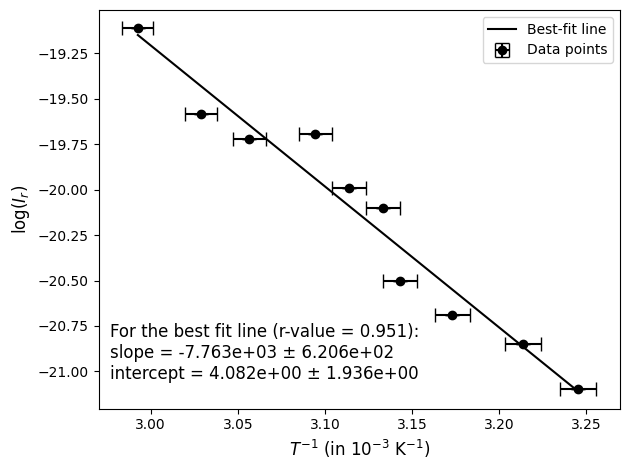

In [28]:
eta = 1
temp, v1 = np.loadtxt('data/ge.txt').transpose()
temp += 273.15
ir = v1/(G*R1)

delIr = ir*np.sqrt((1e-8/v1)**2 + (delG/G)**2 + (0.1/R1)**2)
delys = delIr/ir

a,b = 0,11
xs, ys = 1/temp[a:b], np.log(ir)[a:b]

xfit, yfit, params, errs, label = fit_line(xs, ys)
plt.errorbar(xs*1e3, ys, xerr=xs**2*1e3, yerr=delys, fmt='ko', capsize=5, label='Data points')
plt.plot(xfit*1e3, yfit, '-k', label='Best-fit line')
plt.xlabel(r'$T^{-1}$ (in $10^{-3}$ K$^{-1}$)', fontsize=12); plt.ylabel('$\log(I_r)$', fontsize=12)

# i = 0 # to show the data labels
# for xy in zip(xs*1e3, ys):
#     plt.annotate(f'{temp[a:b][i]-273.15:.0f}, {v1[a:b][i]:.1e}', xy=xy, textcoords='data') # <--
#     i += 1

plt.legend()
plt.text(0.18,0.2,label, fontsize=12,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/plot.eps')

print(f'E0 = {-params[0]*eta*kB}')
print(f'A = {np.exp(params[1])}')
print(f'del E0 = {eta*kB*errs[0]}')

## variation in $E_g$ over the temperature range

In [25]:
a = 35 + 273.15
b = 61 + 273.15
7.917e-4*((a**2/(a+2220)) - (b**2/(2220+b)))

-0.004873674751519666

# silicon: didn't work :(

In [ ]:
readV1('data/si.txt', 25)

In [ ]:
Rg = (97.1+98.8)
G = 1+.635e6/Rg
R1 = 990
kB = 8.6173e-5 # eV K-1

In [ ]:
eta = 1
temp, v1 = np.loadtxt('data/si.txt').transpose()
temp += 273.15
ir = v1/(G*R1)
a,b = 0,10
xs, ys = 1/temp[a:b], np.log(ir)[a:b]

xfit, yfit, params, errs, label = fit_line(xs, ys)
plt.plot(xs*1e3, ys, 'ko')
plt.plot(xfit*1e3, yfit, '-k')
plt.xlabel(r'$T^{-1}$ (in $10^{-3}$ K$^{-1}$)'); plt.ylabel('$\log(I_r)$')
i = 0
for xy in zip(xs*1e3, ys):
    plt.annotate(f'{temp[a:b][i]-273.15:.0f}, {v1[a:b][i]:.1e}', xy=xy, textcoords='data') # <--
    i += 1

params[0], -params[0]*eta*kB #-8458*eta*kB
# temp-273[0:-1]